In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [3]:
def calculate_bpi(labels):
    unique, counts = np.unique(labels, return_counts=True)
    n_clusters = len(unique)

    # If only 1 cluster, balance is 0 (or undefined, but effectively worst for clustering)
    if n_clusters <= 1:
        return 0.0

    # Calculate probabilities (proportions)
    probs = counts / len(labels)

    # Shannon Entropy
    entropy = -np.sum(probs * np.log(probs))

    # Normalize by max possible entropy (log of number of clusters)
    max_entropy = np.log(n_clusters)

    return entropy / max_entropy

1. Load the file data.csv, explore the data showing size and do some data exploration, the dataset is unsupervised

In [7]:
df = pd.read_csv('Feb25data.csv', sep='\t')
print(f'{df.head()}\n')
print(f'size of df: {df.shape}\n')
print(f'{df.describe()}\n')
print(f'{df.info()}\n')
print(f'{df.isnull().sum()}\n')

  F0 F1 F2
0  d  a  a
1  c  e  c
2  j  a  c
3  f  e  j
4  c  e  d

size of df: (1000, 3)

          F0    F1    F2
count   1000  1000  1000
unique    10    10    10
top        d     e     e
freq     100   101   101

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   F0      1000 non-null   object
 1   F1      1000 non-null   object
 2   F2      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None

F0    0
F1    0
F2    0
dtype: int64



2. Do the appropriate pre-processing in order to use the sklearn algorithms on this dataset; the values are qualitative and must be considered as
nominal

In [17]:
#per averli nominali
df2 = pd.get_dummies(df, dtype=int)
print(df2.head())

   F0_a  F0_b  F0_c  F0_d  F0_e  F0_f  F0_g  F0_h  F0_i  F0_j  ...  F2_a  \
0     0     0     0     1     0     0     0     0     0     0  ...     1   
1     0     0     1     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     1  ...     0   
3     0     0     0     0     0     1     0     0     0     0  ...     0   
4     0     0     1     0     0     0     0     0     0     0  ...     0   

   F2_b  F2_c  F2_d  F2_e  F2_f  F2_g  F2_h  F2_i  F2_j  
0     0     0     0     0     0     0     0     0     0  
1     0     1     0     0     0     0     0     0     0  
2     0     1     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     1  
4     0     0     1     0     0     0     0     0     0  

[5 rows x 30 columns]


3. In this dataset the elbow method will show an almost “vanishing” el
bow for inertia, and the silhouette is totally non-effective. As external
background knowledge, we are told that here a requirement for a good
clustering scheme is to have clusters with balanced cluster sizes, e.g. a scheme with cluster sizes (333, 667) is less acceptable than one with (333, 333, 334). In order to obtain this, we to compute, for each clustering scheme a Balanced Partition Index (BPI) computed from the cluster sizes with the function defined in the attached file. BPI values range from 0=worst index to 1=best index. For varying n_clusters fit KMeans and compute the inertia, the silhouette index, and the above mentioned BPI.

In [41]:
inertia_scores = []
silhouette_scores = []
BPI_list = []
best_score = -1
best_k = -1
best_model = None

for k in range(3,15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(df2)

  score = silhouette_score(df2, labels)
  inertia_scores.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(df2, labels))

  BPI_list.append(calculate_bpi(labels))

  if score > best_score:
    best_score = score
    best_k = k
    best_model = kmeans

print(f'best k: {best_k}, \nbest model:{best_model}, \n best score: {best_score:.4f}')

best k: 10, 
best model:KMeans(n_clusters=10, random_state=42), 
 best score: 0.1777


4. Make two plots, one with inertia and silhouette, another with inertia
and BPI, then decide the best number of clusters and refit KMeans us
ing that value.

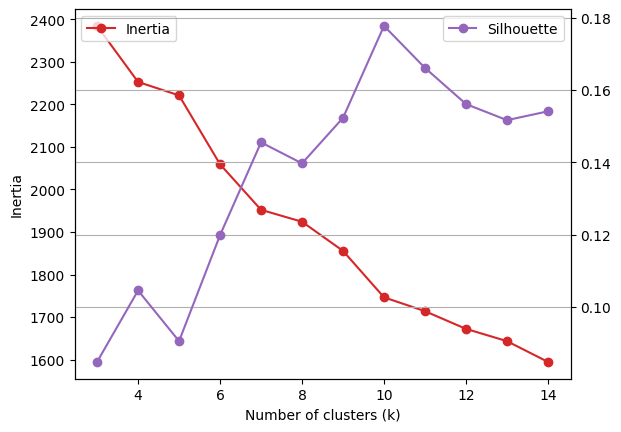

In [38]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.plot(range(3,15), inertia_scores, color = 'tab:red', marker='o', label = 'Inertia')

ax2 = ax1.twinx()
ax2.plot(range(3,15), silhouette_scores, color='tab:purple', marker = 'o', label = 'Silhouette')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.grid(True)
plt.show()

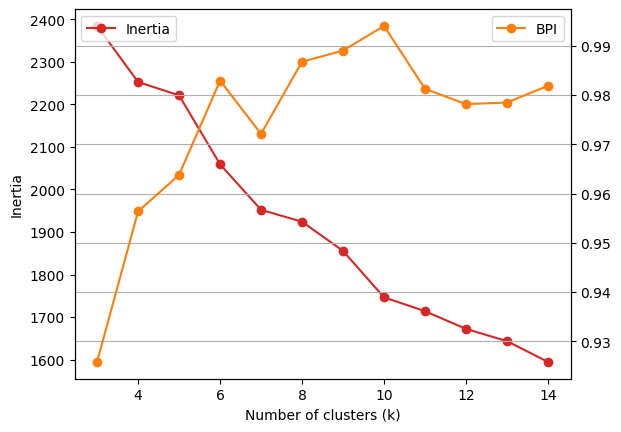

In [32]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.plot(range(3,15), inertia_scores, color = 'tab:red', marker='o', label = 'Inertia')

ax2 = ax1.twinx()
ax2.plot(range(3,15), BPI_list, color='tab:Orange', marker = 'o', label = 'BPI')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.grid(True)
plt.show()

5. Repeat the experiment using a different clustering algorithm of your choice, trying to generate a number of clusters near the one chosen in step 4 and show the results with the best hyperparameter values.

In [45]:
silhouette_scores_agg = []
aggBPI_scores = []
bestbpiagg = -1
best_kagg = -1
best_agg_model = None

for k in range(3,15):
  agg = AgglomerativeClustering(n_clusters = k)
  labelsagg = agg.fit_predict(df2)

  sil = silhouette_score(df2, labelsagg)
  bpi = calculate_bpi(labelsagg)

  silhouette_scores_agg.append(sil)
  aggBPI_scores.append(bpi)

  if bpi > bestbpiagg:
    bestbpiagg = bpi
    best_kagg = k
    best_agg_model = agg

print(f'AGGLOMERATIVE CLUSTERING best k: {best_kagg}, \nbest model:{best_agg_model}')
print(f'KMEANS best k: {best_k}, \nbest model:{best_model}')

AGGLOMERATIVE CLUSTERING best k: 3, 
best model:AgglomerativeClustering(n_clusters=3)
KMEANS best k: 10, 
best model:KMeans(n_clusters=10, random_state=42)


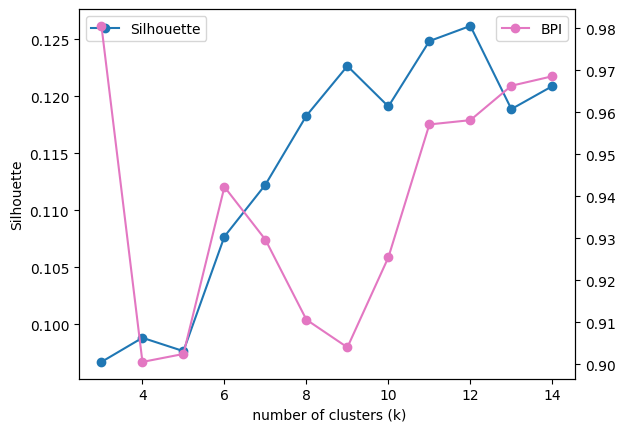

In [43]:
fig, ax3 = plt.subplots()
ax3.plot(range(3,15), silhouette_scores_agg, color='tab:blue', marker='o', label='Silhouette')
ax3.set_ylabel('Silhouette')
ax3.set_xlabel(' number of clusters (k)')
ax4 = ax3.twinx()
ax4.plot(range(3,15),aggBPI_scores, color='tab:pink', marker='o', label='BPI')
ax3.legend(loc = 'upper left')
ax4.legend(loc = 'upper right')
plt.show()

6. Comment the results of the two experiments

In this analysis, I processed a categorical dataset using One-Hot Encoding and compared KMeans and Agglomerative Clustering.

**1. Metric Selection (Why BPI?):**
As anticipated in the instructions, standard metrics like Inertia (Elbow Method) and Silhouette Score were ineffective for this specific dataset structure. Therefore, the **Balanced Partition Index (BPI)** was used as the decisive criterion for model selection, aiming to maximize cluster balance (values close to 1).

**2. Results:**
* **KMeans:** The algorithm suggested **k = 10** as the best configuration.
* **Agglomerative Clustering:** The algorithm suggested **k = 3** as the best configuration, achieving a BPI score ($\approx 0.98$).


**3. Comparison:**
There is a drastic difference in performance between the two algorithms.
**Agglomerative Clustering** proved to be far superior for this specific categorical dataset, finding a partition with almost perfect balance using only 3 clusters. Conversely, **KMeans** struggled to find a balanced structure, suggesting a high number of clusters (10) that resulted in a poor partition index. This highlights that the hierarchical approach of Agglomerative Clustering was better suited for the One-Hot Encoded feature space compared to the centroid-based approach of KMeans.

**Conclusion:**
> I selected **Agglomerative Clustering with k=3** as the final clustering scheme. It is the clear winner as it strictly fulfills the requirement of maximizing the Balanced Partition Index, providing a robust and meaningful grouping of the data.